In [2]:
import bagpipes as pipes
import numpy as np

Modifico il file con la risposta dei filtri in modo tale da avere 15 files per i 15 filtri, con due colonne riportanti lunghezze d'onda in Angstrom e trasmissione.

In [12]:
with open('COSMOS_photometry/FILTER.RES.UVISTA4.1_trimmed.R300', 'r') as f:
  lines = f.readlines()            #file con curve di trasmissione di tutti i filtri
f.close()

with open('COSMOS_photometry/FILTER.RES.UVISTA4.1_trimmed.R300.info', 'r') as f:
  markers = f.readlines()         #file con info sui filtri, le cui stringhe separano i dati nel precedente, lo uso per separare le curve dei singoli filtri 
f.close()

off = []
for mark in markers:       
 for i,line in enumerate(lines):
   if (line in mark):
    off.append(int(i))
off.append(len(lines))

filter_list = []

for i in range(len(off)-1):      #separo i filtri
   filename = 'filters/filt_%d.txt' % (i+1)
   with open(filename, 'w') as f:
    for line in lines[off[i]+1:off[i+1]]:
      f.write(line)
    filter_list.append(filename)
   f.close()

#print(lines[off[0]+1:off[1]])


In [13]:
import pandas as pd
for filename in filter_list:
  df = pd.read_csv(filename, sep="     ", names=['Number', 'Lambda', 'Transmittance'], engine='python')
  #print(df)
  df = df.drop(columns = 'Number')
  print(df.head(10))
  df.to_csv(filename, sep = ' ', header = False, index = False)

   Lambda  Transmittance
0  9540.0       0.025401
1  9550.0       0.028100
2  9560.0       0.033062
3  9570.0       0.037622
4  9580.0       0.043422
5  9590.0       0.050846
6  9600.0       0.059126
7  9610.0       0.068251
8  9620.0       0.079256
9  9630.0       0.092076
    Lambda  Transmittance
0  11430.0       0.009115
1  11440.0       0.009073
2  11450.0       0.010162
3  11460.0       0.011654
4  11470.0       0.013607
5  11480.0       0.015592
6  11490.0       0.018780
7  11500.0       0.022590
8  11510.0       0.026625
9  11520.0       0.031378
    Lambda  Transmittance
0  14610.0       0.008064
1  14620.0       0.008779
2  14630.0       0.008666
3  14640.0       0.009143
4  14650.0       0.009388
5  14660.0       0.010778
6  14670.0       0.011716
7  14680.0       0.012515
8  14690.0       0.012943
9  14700.0       0.014259
    Lambda  Transmittance
0  19340.0       0.004569
1  19350.0       0.007885
2  19360.0       0.006529
3  19370.0       0.006987
4  19380.0       0.0071

Costruisco un modello, facendo predizioni delle magnitudini nelle bande di interesse

In [14]:
exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

model = pipes.model_galaxy(model_components, filt_list=filter_list, phot_units= 'mujy')

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


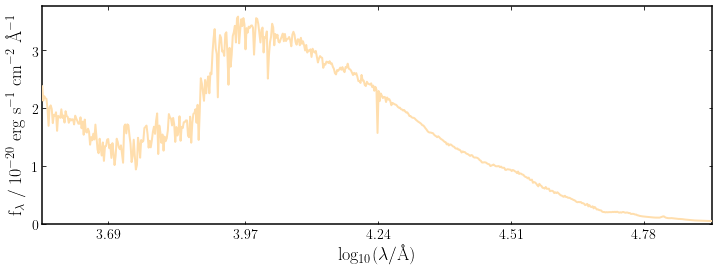

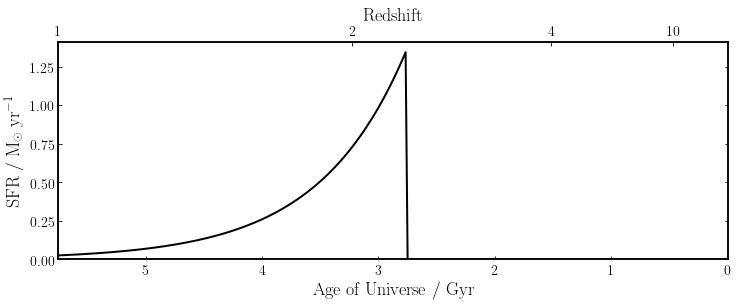

predicted fluxes (muJy) [0.11184053 0.15717237 0.2150064  0.25763276 0.01017897 0.01371853
 0.01088732 0.02030351 0.04572351 0.08737654 0.00944302 0.31122642
 0.23738396 0.16877958 0.11360861]


In [15]:
fig = model.plot()
fig = model.sfh.plot()
print('predicted fluxes (muJy)',model.photometry)

In [28]:
with open('COSMOS_photometry/UVISTA4.1_trimmed.cat', 'r') as f:
    cat = f.readlines()
f.close()
print(cat[0], '\n', cat[1], '\n',cat[2], '\n', cat[3], '\n', cat[4])

#            id              ra             dec          Ks_tot         eKs_tot              Ks             eKs              H               eH            J                 eJ              Y               eY              zp             ezp              ip             eip              rp             erp               V              eV              gp             egp               B              eB               u             eu              ch1            ech1             ch2            ech2             ch3            ech3             ch4            ech4
 
 #
 
               3       150.40550       1.6069111    8.358230e+01    1.231353e+00    4.164801e+01    3.310730e-01    3.524826e+01    2.530637e-01    2.534182e+01    1.907309e-01	   2.279999e+01    1.892379e-01    1.718967e+01    1.276516e-01    1.372068e+01    8.323481e-02    7.691941e+00    7.688955e-02    4.402860e+00    5.225503e-02	   3.120372e+00    3.209952e-02    2.584758e+00    3.732502e-02    1.824820e+00    9.368581e-02	

In [45]:
c_list =pd.Index(['id', 'ra', 'dec', 'Ks_tot', 'eKs_tot', 'Ks', 'eKs', 'H', 'eH', 'J', 'eJ','Y', 'eY', 'zp','ezp','ip','eip','rp','erp', 'V','eV','gp','egp','B','eB','u','eu','ch1','ech1','ch2','ech2','ch3','ech3','ch4','ech4'])
df = pd.read_csv('COSMOS_photometry/UVISTA4.1_trimmed.cat', sep=' ', header=None, skipinitialspace= True, skiprows= 2, engine='python')
df.columns = c_list
print(df.head(10))

   id         ra       dec      Ks_tot   eKs_tot          Ks       eKs  \
0   3  150.40550  1.606911   83.582300  1.231353   41.648010  0.331073   
1   4  150.39050  1.604330   12.480370  0.560622    8.833714  0.254183   
2   5  150.40334  1.606078   80.197670  0.917076   44.662380  0.337045   
3  11  150.41180  1.610758  610.410900  2.202923  259.391400  0.639004   
4  13  150.37770  1.608251  126.049200  1.280248   63.677620  0.373997   
5  15  150.41135  1.605257    1.989051  0.235894    2.146189  0.235148   
6  16  150.41338  1.605285    2.310419  0.244106    2.096174  0.235148   
7  18  150.38197  1.606297    6.165348  0.644230    4.141958  0.241120   
8  21  150.40453  1.606700    2.818413  0.333313    2.321243  0.235894   
9  22  150.38472  1.608538   31.433270  0.703577   20.444780  0.283670   

            H        eH           J  ...         u        eu         ch1  \
0   35.248260  0.253064   25.341820  ...  1.824820  0.093686   32.894920   
1    6.042175  0.211260    4.2345

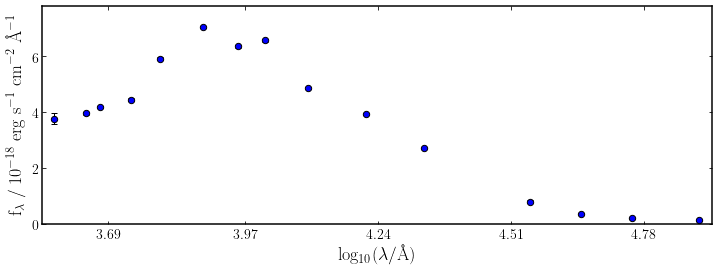

(<Figure size 864x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x2ae819d0898>])

In [118]:
df.at[i,'id']   #
def load_data(Id):
    c_list =pd.Index(['id', 'ra', 'dec', 'Ks_tot', 'eKs_tot', 'Ks', 'eKs', 'H', 'eH', 'J', 'eJ','Y', 'eY', 'zp','ezp','ip','eip','rp','erp', 'V','eV','gp','egp','B','eB','u','eu','ch1','ech1','ch2','ech2','ch3','ech3','ch4','ech4'])
    df = pd.read_csv('COSMOS_photometry/UVISTA4.1_trimmed.cat', sep=' ', header=None, skipinitialspace= True, skiprows= 2, engine='python')
    df.columns = c_list
    flux = [ 'Y', 'J', 'H', 'Ks', 'B', 'V', 'gp', 'rp', 'ip', 'zp', 'u', 'ch1', 'ch2', 'ch3', 'ch4']
    flux_err = [ 'eY', 'eJ', 'eH', 'eKs', 'eB', 'eV', 'egp', 'erp', 'eip', 'ezp', 'eu', 'ech1', 'ech2', 'ech3', 'ech4']
    photometry=np.column_stack(([df.loc[df['id'] == int(Id), flux[l]] for l in range(15)],[df.loc[df['id'] == int(Id), flux_err[l]] for l in range(15)]))
    return photometry

galaxy = pipes.galaxy(ID= '3', load_data= load_data, spectrum_exists = False, filt_list = filter_list)
galaxy.plot()